In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


#Dataset Exploration

In [ ]:
df = pd.read_csv('../data/heart.csv')

print(df.info())
print('\n')
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        1

#CHECKING FOR DUPLICATES CHECKING AND MISSING VALUES

In [ ]:
print(df[df.duplicated()])
print(df.isnull().sum())

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


#DATA VISUALIZATION

In [ ]:
cat_df = df.select_dtypes(include=['object'])
print(cat_df.head())

cat_var = cat_df.columns.tolist()

num_df = df.select_dtypes(include=['float64','int64'])
num_var = num_df.columns.tolist()

  Sex ChestPainType RestingECG ExerciseAngina ST_Slope
0   M           ATA     Normal              N       Up
1   F           NAP     Normal              N     Flat
2   M           ATA         ST              N       Up
3   F           ASY     Normal              Y     Flat
4   M           NAP     Normal              N       Up


# Men often have higher risk at youger ages

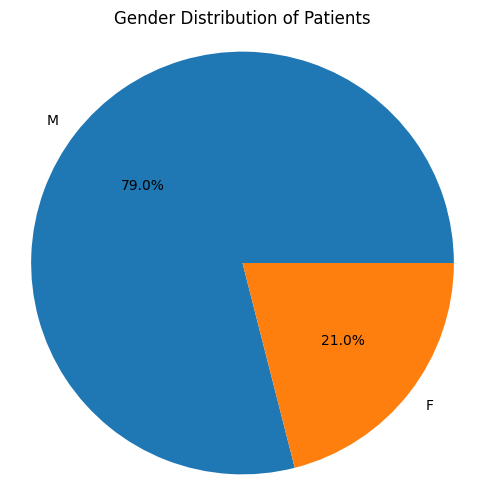

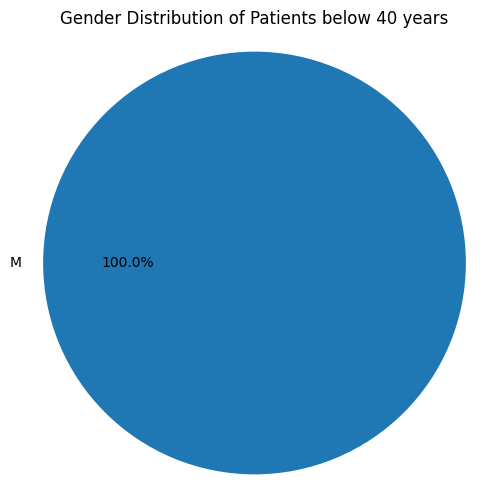

In [ ]:
gender_counts = df['Sex'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%')
plt.title('Gender Distribution of Patients')
plt.axis('equal')
plt.show()


df_age = df[df['Age']< 30]
gender_counts = df_age['Sex'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%')
plt.title('Gender Distribution of Patients below 40 years')
plt.axis('equal')
plt.show()




# Risk of heart disease generally increase with age

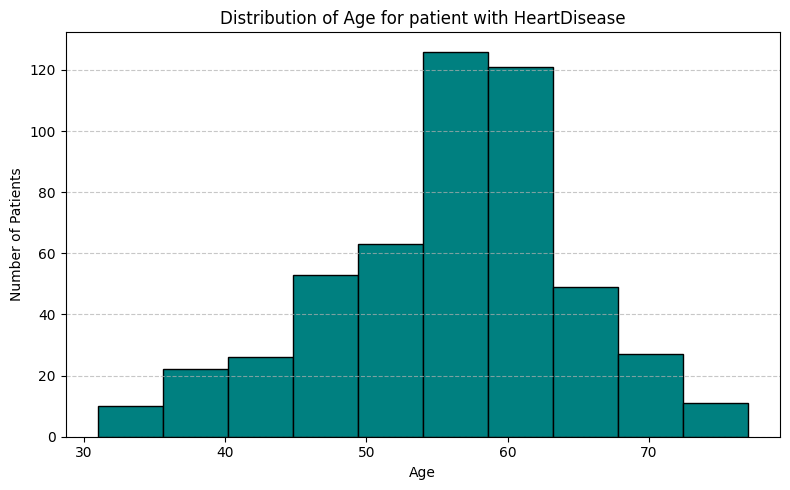

In [ ]:
df['HeartDisease'].unique()

patient_1 = df[df['HeartDisease'] == 1]
patient_0 = df[df['HeartDisease']== 0]


plt.figure(figsize=(8, 5))
plt.hist(patient_1['Age'], bins=10, color='teal', edgecolor='black')
plt.title('Distribution of Age for patient with HeartDisease')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Is high Cholesterol a risk factor for cardiovascular disease?

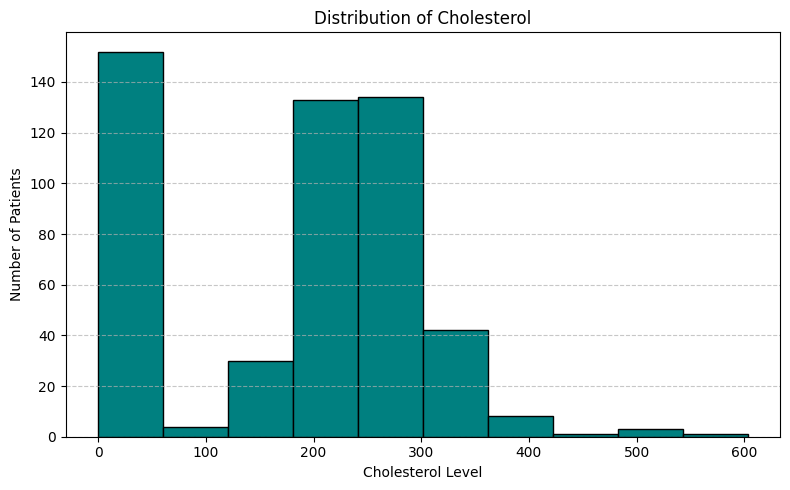

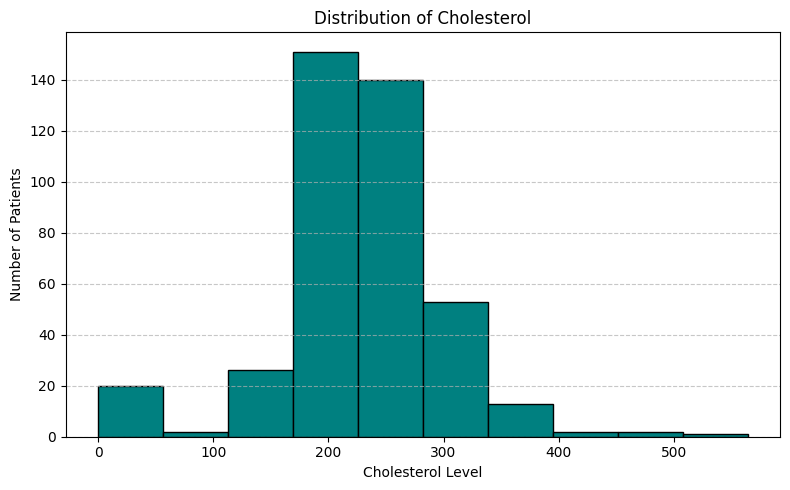

In [ ]:


plt.figure(figsize=(8, 5))
plt.hist(patient_1['Cholesterol'], bins=10, color='teal', edgecolor='black')
plt.title('Distribution of Cholesterol with HeartDisease')
plt.xlabel('Cholesterol Level')
plt.ylabel('Number of Patients')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



plt.figure(figsize=(8, 5))
plt.hist(patient_0['Cholesterol'], bins=10, color='teal', edgecolor='black')
plt.title('Distribution of Cholesterol for patient without HeartDisease')
plt.xlabel('Cholesterol Level')
plt.ylabel('Number of Patients')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




# Average colesterol level

In [ ]:
df_grouped = df.groupby('HeartDisease').agg({
    'Cholesterol':'mean',
    'RestingBP':'mean',
    'MaxHR' : 'mean'
})

df_grouped.index = df_grouped.index.map({0: 'Without HeartDisease', 1: 'With HeartDisease'})

print(df_grouped)


                      Cholesterol   RestingBP       MaxHR
HeartDisease                                             
Without HeartDisease   227.121951  130.180488  148.151220
With HeartDisease      175.940945  134.185039  127.655512


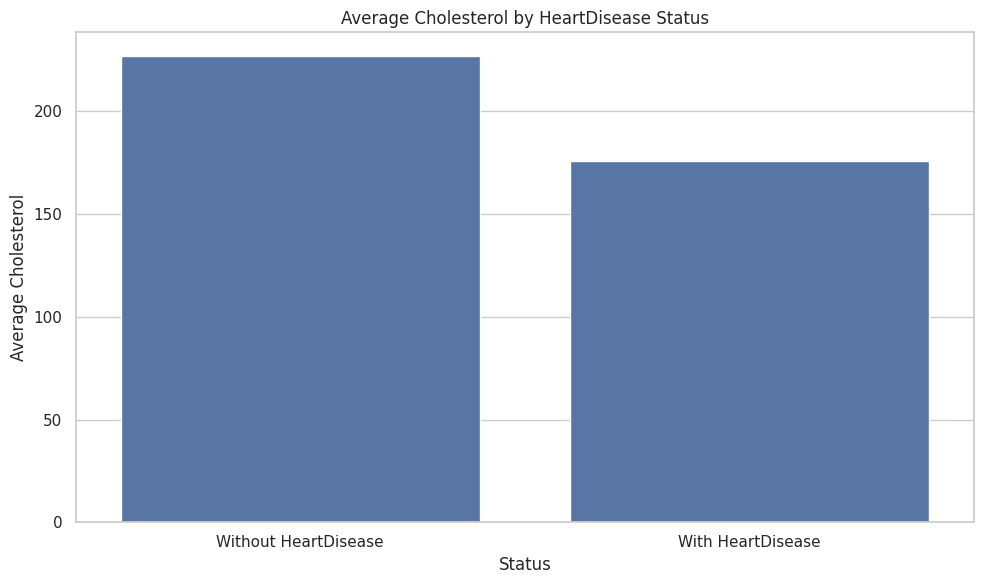

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=df_grouped.index,y= df_grouped['Cholesterol'])
plt.title("Average Cholesterol by HeartDisease Status")
plt.ylabel("Average Cholesterol")
plt.xlabel("Status")
plt.tight_layout()
plt.show()

# High bood pressure increases risk for heart disease

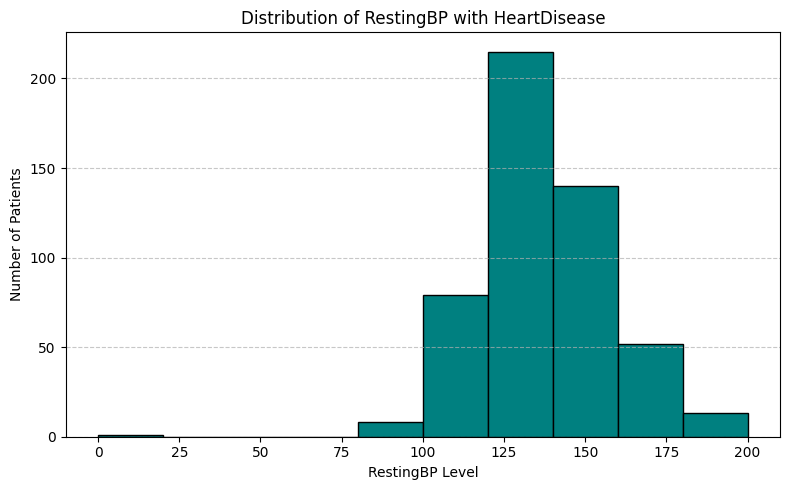

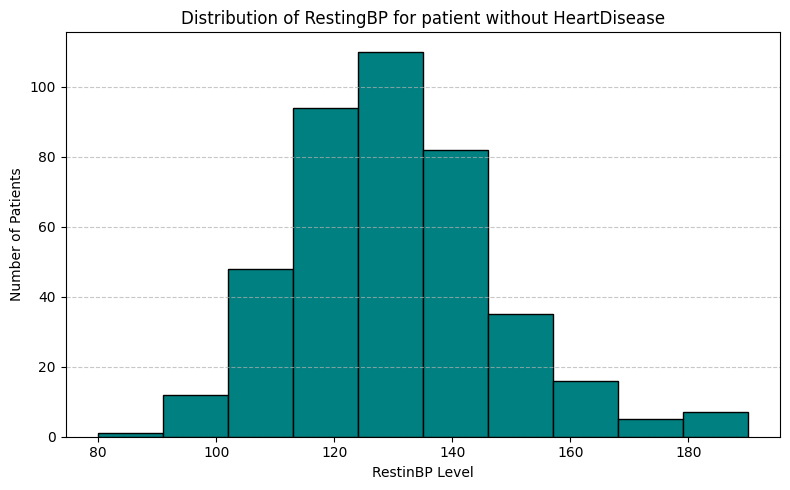

In [ ]:


plt.figure(figsize=(8, 5))
plt.hist(patient_1['RestingBP'], bins=10, color='teal', edgecolor='black')
plt.title('Distribution of RestingBP with HeartDisease')
plt.xlabel('RestingBP Level')
plt.ylabel('Number of Patients')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



plt.figure(figsize=(8, 5))
plt.hist(patient_0['RestingBP'], bins=10, color='teal', edgecolor='black')
plt.title('Distribution of RestingBP for patient without HeartDisease')
plt.xlabel('RestinBP Level')
plt.ylabel('Number of Patients')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




# Average RestingBP Level

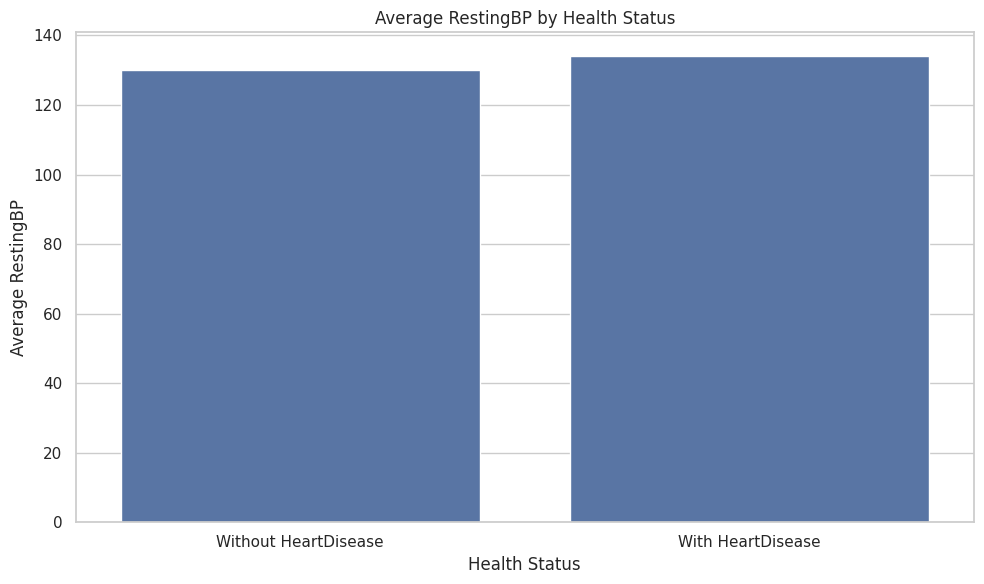

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=df_grouped.index,y= df_grouped['RestingBP'])
plt.title("Average RestingBP by Health Status")
plt.ylabel("Average RestingBP")
plt.xlabel("Health Status")
plt.tight_layout()
plt.show()

#Maximum hear rate achieved during exercise

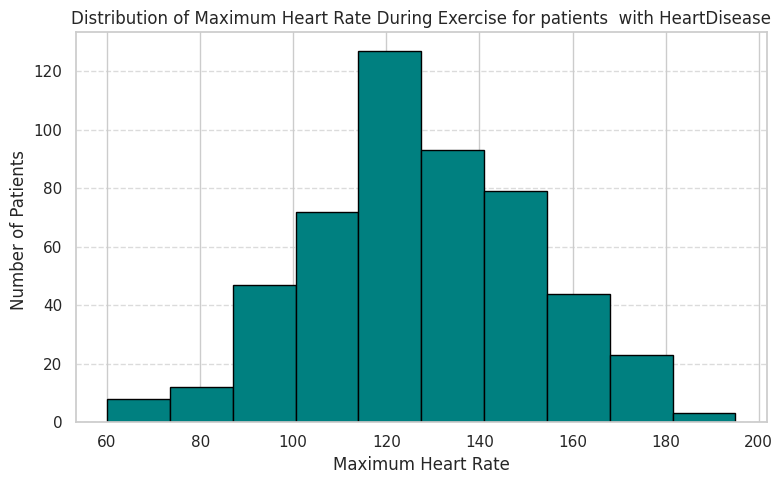

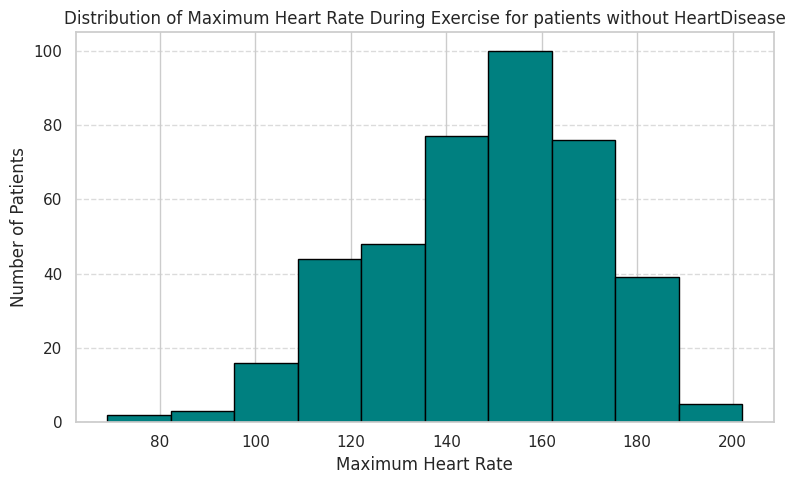

In [ ]:


plt.figure(figsize=(8, 5))
plt.hist(patient_1['MaxHR'], bins=10, color='teal', edgecolor='black')
plt.title('Distribution of Maximum Heart Rate During Exercise for patients  with HeartDisease')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Number of Patients ')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



plt.figure(figsize=(8, 5))
plt.hist(patient_0['MaxHR'], bins=10, color='teal', edgecolor='black')
plt.title('Distribution of Maximum Heart Rate During Exercise for patients without HeartDisease')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Number of Patients')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




# Average Hear Rate During Exercise

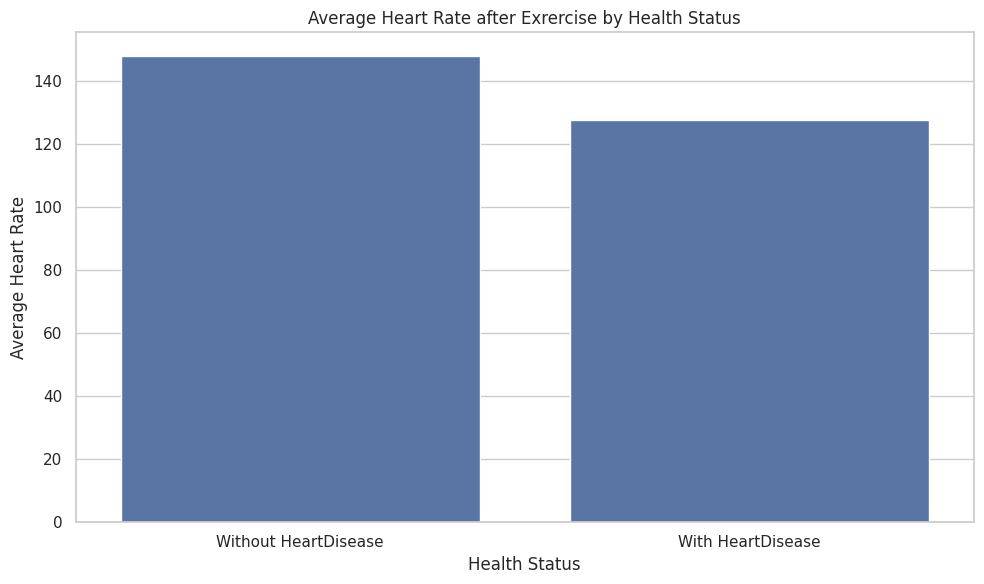

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=df_grouped.index,y= df_grouped['MaxHR'])
plt.title("Average Heart Rate after Exrercise by Health Status")
plt.ylabel("Average Heart Rate")
plt.xlabel("Health Status")
plt.tight_layout()
plt.show()

# Encoding of categorical variables

In [ ]:

for col in cat_df.columns:
  print(f'{col}: {cat_df[col].unique()}')

Sex: ['M' 'F']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
RestingECG: ['Normal' 'ST' 'LVH']
ExerciseAngina: ['N' 'Y']
ST_Slope: ['Up' 'Flat' 'Down']


In [ ]:
# One-hot encode
df_encoded = pd.get_dummies(df, columns=cat_var,dtype=int,drop_first=True)

print(df_encoded)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140          289          0    172      0.0             0   
1     49        160          180          0    156      1.0             1   
2     37        130          283          0     98      0.0             0   
3     48        138          214          0    108      1.5             1   
4     54        150          195          0    122      0.0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110          264          0    132      1.2             1   
914   68        144          193          1    141      3.4             1   
915   57        130          131          0    115      1.2             1   
916   57        130          236          0    174      0.0             1   
917   38        138          175          0    173      0.0             0   

     Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0    

In [ ]:
X = df_encoded.drop(columns='HeartDisease')
y = df_encoded['HeartDisease']


X_train,X_test,y_train,y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)
print(X_train.shape)


(642, 15)


In [ ]:

bag = BaggingClassifier(
    estimator=LogisticRegression(max_iter=1000),  # increase max_iter to avoid convergence warnings
    random_state=42
)

# Parameter grid for bagging + logistic regression
param_grid = {
    "bag__n_estimators": [10, 50, 100],
    "bag__estimator__C": [0.01, 0.1, 1, 10],
    "bag__max_samples": [0.5, 1.0],
    "bag__max_features": [0.5, 1.0]
}
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("bag", BaggingClassifier(
        estimator=LogisticRegression(max_iter=1000),
        random_state=42
    ))
])
# Grid search
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid.fit(X, y)

# Results
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Best parameters: {'bag__estimator__C': 0.1, 'bag__max_features': 1.0, 'bag__max_samples': 0.5, 'bag__n_estimators': 50}
Best score: 0.8365763839391779


 # compare XGBoost and LightGBM with feature importance

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [03:07:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 344, number of negative: 298
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 344
[LightGBM] [Info] Number of data points in the train set: 642, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.535826 -> initscore=0.143548
[LightGBM] [Info] Start training from score 0.143548
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

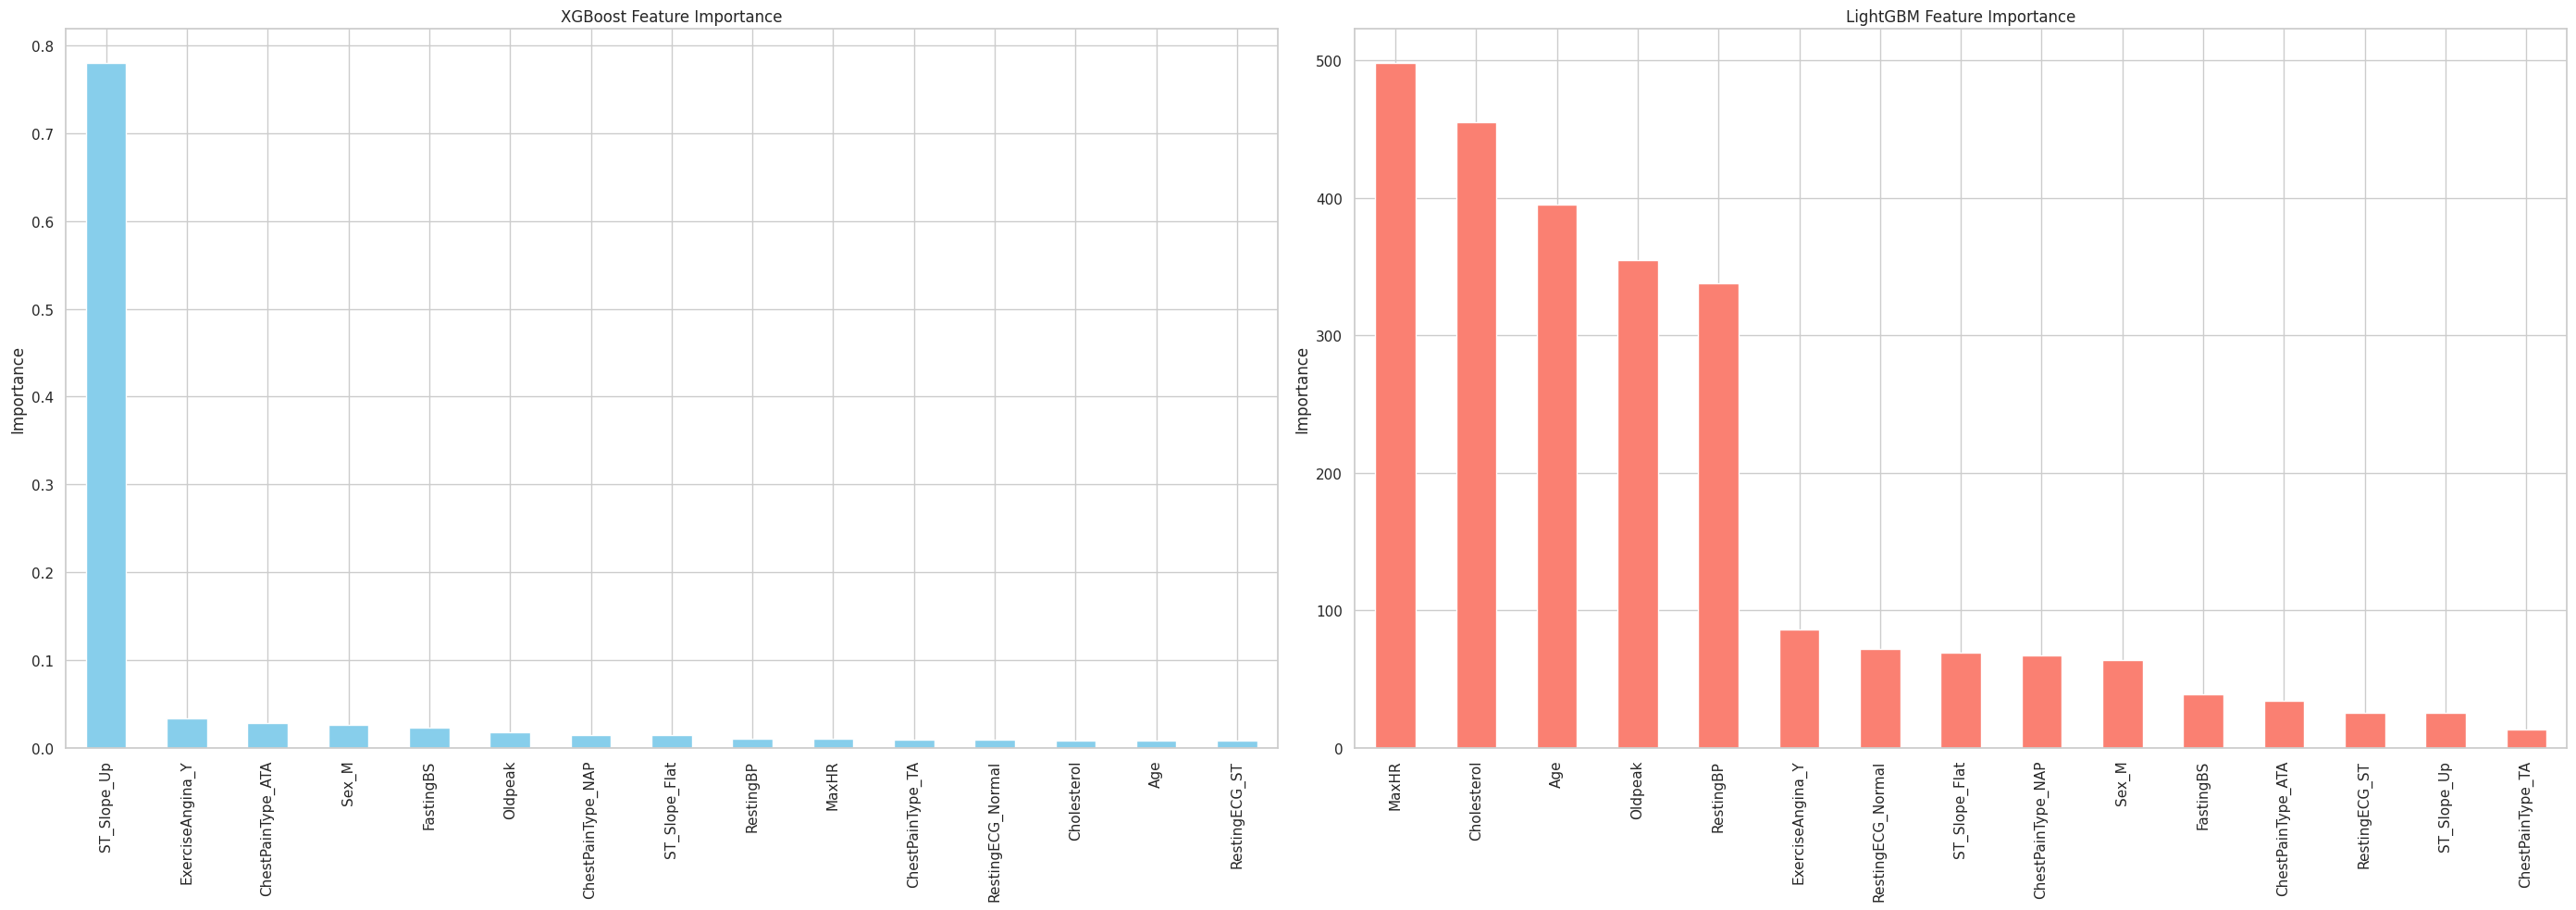

In [ ]:
xgb = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)

# -------------------------------
# Train LightGBM
# -------------------------------
lgbm = LGBMClassifier(n_estimators=100, random_state=42)
lgbm.fit(X_train, y_train)


xgb_importance = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
lgbm_importance = pd.Series(lgbm.feature_importances_, index=X.columns).sort_values(ascending=False)


fig, axes = plt.subplots(1, 2, figsize=(28,10))

xgb_importance.plot(kind='bar', ax=axes[0], color='skyblue', title='XGBoost Feature Importance')
axes[0].set_ylabel('Importance')

lgbm_importance.plot(kind='bar', ax=axes[1], color='salmon', title='LightGBM Feature Importance')
axes[1].set_ylabel('Importance')

plt.tight_layout()
plt.show()
